# Imports

In [ ]:
pip install fast-pagerank

In [ ]:
pip install networkx

In [ ]:
import numpy as np
from scipy import sparse
from fast_pagerank import pagerank
from fast_pagerank import pagerank_power
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('match_scores_1991-2016_unindexed_csv.csv')

# Code

In [ ]:
names_to_ids = {}
id_counter = 0
edges = []

for i in range(df.shape[0]):
  match = []
  winner = df.iloc[i]['winner_name']
  loser = df.iloc[i]['loser_name']

 # handle loser
  if loser in names_to_ids:
    match.append(names_to_ids[loser])
  else:
    id_counter+=1
    names_to_ids[loser] = id_counter
    match.append(names_to_ids[loser])

  # handle winner
  if winner in names_to_ids:
    match.append(names_to_ids[winner])
  else:
    id_counter+=1
    names_to_ids[winner] = id_counter
    match.append(names_to_ids[winner])
 
  edges.append(match)

In [ ]:
import numpy as np
np_edges = np.array(edges)
weights = [1] * len(edges)

In [ ]:
G = sparse.csr_matrix((weights, (np_edges[:,0], np_edges[:,1])), shape=(len(edges), len(edges)))
pr=pagerank(G, p=1)

[2.34140908e-11 4.10385855e-03 1.18503579e-03 ... 2.34140908e-11
 2.34140908e-11 2.34140908e-11]


In [ ]:
np_pr = np.array(pr)

In [ ]:
t10 = np_pr.argsort()[-10:][::-1]

In [ ]:
ids_to_names = {}
for name, id in names_to_ids.items():
  if id in t10:
    ids_to_names[id]=name
for id in t10:
  print(ids_to_names[id])

Roger Federer
Rafael Nadal
Novak Djokovic
Andy Murray
David Ferrer
Pete Sampras
Andre Agassi
Andy Roddick
Lleyton Hewitt
Tomas Berdych


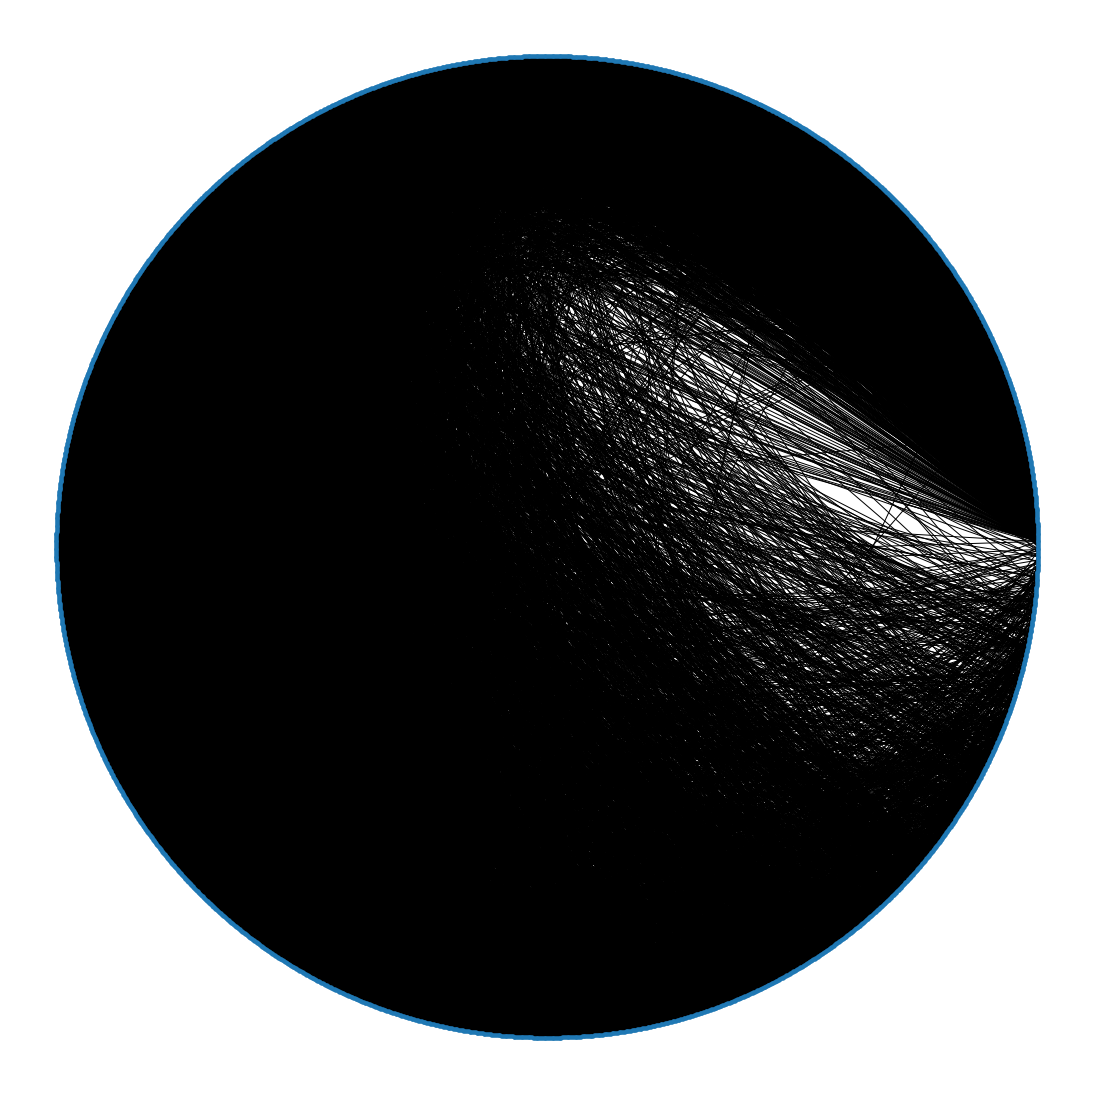

In [ ]:
G = nx.from_pandas_edgelist(df, source = 'winner_name', target = 'loser_name')
pos = nx.circular_layout(G)
plt.figure(3,figsize=(15,15)) 
nx.draw(G,pos,node_size=10,font_size=8)
plt.show()